# Obesity Analysis

### Table Of Contents

### [Extraction](#extract)

### [Transform](#transform)

- [Age](#age)

- [Education](#education)

- [Gender](#gender)

- [Income](#income)

- [Ethnicity](#ethnicity)

### [Load](#load)

- [Age Graphs](#graphs-age)

- [Education Graphs](#graphs-education)

- [Gender Graphs](#graphs-gender)

- [Income Graphs](#graphs-income)

- [Ethnicity Graphs](#graphs-ethnic)

### [To Do](#todo)

# Extract

<a id='extract'></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv(r".\data/obesitysurveyUSA.csv")
df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
list(df.columns)

['YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'Datasource',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Alt',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit ',
 'Sample_Size',
 'Total',
 'Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity',
 'GeoLocation',
 'ClassID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'LocationID',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategoryId1',
 'StratificationID1']

In [5]:
print(df['Question'].unique())

['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults who report consuming veg

In [6]:
print(df['LocationAbbr'].unique())

['AL' 'US' 'AK' 'AZ' 'AR' 'CA' 'CT' 'CO' 'DE' 'FL' 'DC' 'GA' 'GU' 'HI'
 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO'
 'MT' 'NE' 'NV' 'NH' 'NM' 'NJ' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR'
 'RI' 'SC' 'TN' 'SD' 'TX' 'UT' 'VT' 'VA' 'WV' 'WA' 'WI' 'WY' 'VI']


In [7]:
print(df['YearStart'].unique())

[2011 2012 2014 2013 2015 2016 2017]


In [8]:
MainColumns = ['YearStart',
 'LocationAbbr',
#  'LocationDesc',
 'Question',
 'Data_Value',
 'Sample_Size',
 'Total',
]

DisinctColumns = ['Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity',
]

AgeDF = df[MainColumns]
EducationDF = df[MainColumns]
GenderDF = df[MainColumns]
IncomeDF = df[MainColumns]
EthnicityDF = df[MainColumns]

# ListOfDF = [AgeDF, EducationDF, GenderDF, IncomeDF, EducationDF]

# for DF in ListOfDF:
#     DF = df[MainColumns]
    # print(DF)


AgeDF['Age(years)'] = df['Age(years)']
EducationDF['Education'] = df['Education']
GenderDF['Gender'] = df['Gender']
IncomeDF['Income'] = df['Income']
EthnicityDF['Race/Ethnicity'] = df['Race/Ethnicity']

# ToDo:
# Find way to put above cell in loop
# Find way to clear warnings below

C:\Users\nrovr\AppData\Local\Temp\ipykernel_7308\621049251.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AgeDF['Age(years)'] = df['Age(years)']
C:\Users\nrovr\AppData\Local\Temp\ipykernel_7308\621049251.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EducationDF['Education'] = df['Education']
C:\Users\nrovr\AppData\Local\Temp\ipykernel_7308\621049251.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [9]:
# Food_df = pd.read_csv(r".\data/food_table1.csv",encoding='cp1252')
# Food_df.head(5)

#### Info I'm Interested In

- Sugar - Possible Link to Diabetes
- Food groups Janeel has

##### Keep/Remove

- Keep Variables that contain total for the years
- Remove Commodity column

In [10]:
# Condition_df = pd.read_csv(r".\data/RegionalInterestByConditionOverTime.csv")
# Condition_df.head(5)

In [11]:
# print(Condition_df['dma'].unique())

# Age Database

<a id='age'></a>

In [12]:
AgeDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Age(years)
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [13]:
AgeDF = AgeDF[AgeDF['Age(years)'].notna()]
# AgeDF = AgeDF[AgeDF['Total'].notna() | AgeDF['Age(years)'].notna()]
# AgeDF['Age(years)'] = AgeDF['Total'].combine_first(AgeDF['Age(years)'])
AgeDF = AgeDF.drop('Total', axis=1)
AgeDF.head(6)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Age(years)
7,2011,AL,Percent of adults aged 18 years and older who ...,16.3,356.0,18 - 24
8,2011,AL,Percent of adults aged 18 years and older who ...,35.2,598.0,25 - 34
9,2011,AL,Percent of adults aged 18 years and older who ...,35.5,865.0,35 - 44
10,2011,AL,Percent of adults aged 18 years and older who ...,38.0,1288.0,45 - 54
11,2011,AL,Percent of adults aged 18 years and older who ...,36.4,1676.0,55 - 64
12,2011,AL,Percent of adults aged 18 years and older who ...,27.1,2521.0,65 or older


# Education Dataset

<a id='education'></a>

In [14]:
EducationDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Education
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,Less than high school
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,High school graduate


In [15]:
EducationDF = EducationDF[EducationDF['Education'].notna()]
# EducationDF = EducationDF[EducationDF['Total'].notna() | EducationDF['Education'].notna()]
# EducationDF['Education'] = EducationDF['Total'].combine_first(EducationDF['Education'])
EducationDF = EducationDF.drop('Total', axis=1)
EducationDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Education
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,Less than high school
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,High school graduate
5,2011,AL,Percent of adults aged 18 years and older who ...,33.8,1925.0,Some college or technical school
6,2011,AL,Percent of adults aged 18 years and older who ...,26.4,1812.0,College graduate
31,2011,AL,Percent of adults aged 18 years and older who ...,33.2,1153.0,Less than high school


# Gender Dataset

<a id='gender'></a>

In [16]:
GenderDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Gender
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,Male
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,Female
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [17]:
GenderDF = GenderDF[GenderDF['Gender'].notna()]
# GenderDF = GenderDF[GenderDF['Total'].notna() | GenderDF['Gender'].notna()]
GenderDF['Gender'] = GenderDF['Total'].combine_first(GenderDF['Gender'])
GenderDF = GenderDF.drop('Total', axis=1)
GenderDF.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Gender
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,Male
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,Female
29,2011,AL,Percent of adults aged 18 years and older who ...,39.0,2581.0,Male
30,2011,AL,Percent of adults aged 18 years and older who ...,30.5,4723.0,Female
58,2011,AL,Percent of adults who achieve at least 150 min...,45.4,2441.0,Male
59,2011,AL,Percent of adults who achieve at least 150 min...,39.6,4750.0,Female
88,2011,AL,Percent of adults who achieve at least 150 min...,17.3,2424.0,Male
89,2011,AL,Percent of adults who achieve at least 150 min...,12.8,4721.0,Female
116,2011,AL,Percent of adults who achieve at least 300 min...,25.3,2429.0,Male
117,2011,AL,Percent of adults who achieve at least 300 min...,22.7,4723.0,Female


# Income Dataset

<a id='income'></a>

In [18]:
IncomeDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Income
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [19]:
IncomeDF = IncomeDF[IncomeDF['Income'].notna()]
# IncomeDF = IncomeDF[IncomeDF['Total'].notna() | IncomeDF['Income'].notna()]
# IncomeDF['Income'] = IncomeDF['Total'].combine_first(IncomeDF['Income'])
IncomeDF = IncomeDF.drop('Total', axis=1)
IncomeDF.head(8)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Income
13,2011,AL,Percent of adults aged 18 years and older who ...,38.5,1112.0,"Less than $15,000"
14,2011,AL,Percent of adults aged 18 years and older who ...,34.8,1367.0,"$15,000 - $24,999"
15,2011,AL,Percent of adults aged 18 years and older who ...,35.8,757.0,"$25,000 - $34,999"
16,2011,AL,Percent of adults aged 18 years and older who ...,32.3,861.0,"$35,000 - $49,999"
17,2011,AL,Percent of adults aged 18 years and older who ...,34.1,785.0,"$50,000 - $74,999"
18,2011,AL,Percent of adults aged 18 years and older who ...,28.8,1125.0,"$75,000 or greater"
19,2011,AL,Percent of adults aged 18 years and older who ...,23.8,1297.0,Data not reported
41,2011,AL,Percent of adults aged 18 years and older who ...,28.4,1112.0,"Less than $15,000"


# Ethnicity Dataset

<a id='ethnicity'></a>

In [20]:
EthnicityDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Race/Ethnicity
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [21]:
EthnicityDF = EthnicityDF[EthnicityDF['Race/Ethnicity'].notna()]
# EthnicityDF = EthnicityDF[EthnicityDF['Total'].notna() | EthnicityDF['Race/Ethnicity'].notna()]
# EthnicityDF['Race/Ethnicity'] = EthnicityDF['Total'].combine_first(EthnicityDF['Race/Ethnicity'])
EthnicityDF = EthnicityDF.drop('Total', axis=1)
EthnicityDF = EthnicityDF[EthnicityDF['Data_Value'].notna()]
EthnicityDF.head(9)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity
20,2011,AL,Percent of adults aged 18 years and older who ...,29.8,5042.0,Non-Hispanic White
21,2011,AL,Percent of adults aged 18 years and older who ...,40.1,1878.0,Non-Hispanic Black
22,2011,AL,Percent of adults aged 18 years and older who ...,28.6,115.0,Hispanic
25,2011,AL,Percent of adults aged 18 years and older who ...,32.9,61.0,American Indian/Alaska Native
26,2011,AL,Percent of adults aged 18 years and older who ...,27.8,58.0,2 or more races
48,2011,AL,Percent of adults aged 18 years and older who ...,36.4,5042.0,Non-Hispanic White
49,2011,AL,Percent of adults aged 18 years and older who ...,30.1,1878.0,Non-Hispanic Black
50,2011,AL,Percent of adults aged 18 years and older who ...,34.5,115.0,Hispanic
53,2011,AL,Percent of adults aged 18 years and older who ...,31.4,61.0,American Indian/Alaska Native


# Graphs

<a id='graphs'></a>

### Possible Graph Breakdowns To Consider

- Years: 2011 to 2017
- Num of Questions: 9
- Num of Age Categories: 6
- Num of Education Categories: 4
- Genders: 2
- Num of Income Categories: 7* (One Category is named 'Data not reported')
- Num of Ethnicity Categories: 8* (Some values are NaN due to low amounts of input)

### List Of Questions

- 'Percent of adults aged 18 years and older who have obesity'
- 'Percent of adults aged 18 years and older who have an overweight classification'
- 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
- 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
- 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
- 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
- 'Percent of adults who engage in no leisure-time physical activity'
- 'Percent of adults who report consuming vegetables less than one time daily'
- 'Percent of adults who report consuming fruit less than one time daily'

In [22]:
# This cell allows you to take an indepth look at the data within the obesity survey dataset

Year = 2015
Location = 'US'
Question = 'Percent of adults aged 18 years and older who have obesity'

Years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

## Age Graph

<a id='graphs-age'></a>

In [23]:
AgeDF_Anaylsis = AgeDF.copy()

AgeDF_Anaylsis = AgeDF_Anaylsis[AgeDF_Anaylsis["YearStart"] == Year]
AgeDF_Anaylsis = AgeDF_Anaylsis[AgeDF_Anaylsis["LocationAbbr"] == Location]
AgeDF_Anaylsis = AgeDF_Anaylsis[AgeDF_Anaylsis["Question"] == Question]

AgeDF_Anaylsis.head(20)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Age(years)
39660,2015,US,Percent of adults aged 18 years and older who ...,34.0,64418.0,45 - 54
39765,2015,US,Percent of adults aged 18 years and older who ...,16.7,21539.0,18 - 24
39766,2015,US,Percent of adults aged 18 years and older who ...,26.7,37389.0,25 - 34
39767,2015,US,Percent of adults aged 18 years and older who ...,27.6,141064.0,65 or older
39768,2015,US,Percent of adults aged 18 years and older who ...,32.1,45319.0,35 - 44
39769,2015,US,Percent of adults aged 18 years and older who ...,33.4,88587.0,55 - 64


In [24]:
AgeDF_Expanded = AgeDF.copy()

AgeDF_Expanded = AgeDF_Expanded.drop('YearStart', axis=1)
AgeDF_Expanded = AgeDF_Expanded.drop('Data_Value', axis=1)
AgeDF_Expanded = AgeDF_Expanded.drop('Sample_Size', axis=1)

# AgeDF_Expanded = AgeDF_Expanded[AgeDF_Expanded["LocationAbbr"] == Location]
# AgeDF_Expanded = AgeDF_Expanded[AgeDF_Expanded["Question"] == Question]

AgeDF_Expanded = AgeDF_Expanded.reset_index(drop=True)

for year in range(2011, 2018):
    TempDF = AgeDF.copy()
    
    # TempDF = TempDF[TempDF["LocationAbbr"] == Location]
    # TempDF = TempDF[TempDF["Question"] == Question]
    TempDF = TempDF[TempDF["YearStart"] == year]
    
    TempDF = TempDF.reset_index(drop=True)

    AgeDF_Expanded[f"Data Value {year}"] = TempDF["Data_Value"]
    # AgeDF_Expanded[f"Sample Size {year}"] = TempDF["Sample_Size"]

AgeDF_Expanded = AgeDF_Expanded.dropna()
AgeDF_Expanded.sort_values(by='Data Value 2011', ascending=False)
AgeDF_Expanded.head(10)
# AgeDF_Expanded.shape

,LocationAbbr,Question,Age(years),Data Value 2011,Data Value 2012,Data Value 2013,Data Value 2014,Data Value 2015,Data Value 2016,Data Value 2017
0,AL,Percent of adults aged 18 years and older who ...,18 - 24,16.3,23.9,19.0,35.1,18.7,25.5,53.5
1,AL,Percent of adults aged 18 years and older who ...,25 - 34,35.2,31.3,30.4,20.4,25.5,33.5,62.6
2,AL,Percent of adults aged 18 years and older who ...,35 - 44,35.5,34.1,36.7,31.7,27.6,35.7,60.2
3,AL,Percent of adults aged 18 years and older who ...,45 - 54,38.0,39.7,40.0,40.9,28.3,37.6,59.0
4,AL,Percent of adults aged 18 years and older who ...,55 - 64,36.4,40.3,37.1,39.9,31.3,39.1,56.1
5,AL,Percent of adults aged 18 years and older who ...,65 or older,27.1,26.9,28.4,37.4,41.1,38.6,56.2
6,AL,Percent of adults aged 18 years and older who ...,18 - 24,27.1,26.4,24.8,28.9,33.1,18.3,40.0
7,AL,Percent of adults aged 18 years and older who ...,25 - 34,31.9,35.0,38.6,26.3,40.0,31.8,39.7
8,AL,Percent of adults aged 18 years and older who ...,35 - 44,33.3,34.2,32.2,32.3,40.6,29.0,44.7
9,AL,Percent of adults aged 18 years and older who ...,45 - 54,35.8,35.0,35.1,31.3,43.7,38.1,55.5


### Prep Main DF for ML

In [95]:
LineRegressModelDF = df.copy()

colsToKeep = ['YearStart',
 'LocationAbbr',
#  'LocationDesc',
 'Question',
 'Data_Value',
 'Sample_Size',
 'Total',
 'Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity',
 ]

LineRegressModelDF = LineRegressModelDF[colsToKeep]

LineRegressModelDF.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN
5,2011,AL,Percent of adults aged 18 years and older who ...,33.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN
6,2011,AL,Percent of adults aged 18 years and older who ...,26.4,1812.0,NaN,NaN,College graduate,NaN,NaN,NaN
7,2011,AL,Percent of adults aged 18 years and older who ...,16.3,356.0,NaN,18 - 24,NaN,NaN,NaN,NaN
8,2011,AL,Percent of adults aged 18 years and older who ...,35.2,598.0,NaN,25 - 34,NaN,NaN,NaN,NaN
9,2011,AL,Percent of adults aged 18 years and older who ...,35.5,865.0,NaN,35 - 44,NaN,NaN,NaN,NaN


### Create Dummy Variables

In [96]:
tmp = pd.get_dummies(LineRegressModelDF['LocationAbbr'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('LocationAbbr', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Question'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Question', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Total'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Total', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Age(years)'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Age(years)', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Education'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Education', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Gender'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Gender', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Income'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Income', axis=1)

tmp = pd.get_dummies(LineRegressModelDF['Race/Ethnicity'], drop_first=True)
LineRegressModelDF = pd.concat([LineRegressModelDF, tmp], axis=1)
LineRegressModelDF = LineRegressModelDF.drop('Race/Ethnicity', axis=1)

In [98]:
LineRegressModelDF = LineRegressModelDF[LineRegressModelDF['Data_Value'].notna()]
LineRegressModelDF = LineRegressModelDF[LineRegressModelDF['Sample_Size'].notna()]
# LineRegressModelDF = LineRegressModelDF[LineRegressModelDF['Race/Ethnicity'].notna()]

LineRegressModelDF.head(5)

# Turn entries where sameple size, data value are NaN into 0

,YearStart,Data_Value,Sample_Size,AL,AR,AZ,CA,CO,CT,DC,...,"$75,000 or greater",Data not reported,"Less than $15,000",American Indian/Alaska Native,Asian,Hawaiian/Pacific Islander,Hispanic,Non-Hispanic Black,Non-Hispanic White,Other
0,2011,32.0,7304.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,32.3,2581.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,31.8,4723.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,33.6,1153.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,32.8,2402.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
LineRegressModelDF.shape

(52681, 87)

In [100]:
df.shape

(58408, 33)

In [101]:
LineRegressModelDF.describe()

,YearStart,Data_Value,Sample_Size,AL,AR,AZ,CA,CO,CT,DC,...,"$75,000 or greater",Data not reported,"Less than $15,000",American Indian/Alaska Native,Asian,Hawaiian/Pacific Islander,Hispanic,Non-Hispanic Black,Non-Hispanic White,Other
count,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,...,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000
mean,2014.183368,31.008931,3807.587024,0.018394,0.018451,0.019628,0.019855,0.019855,0.019305,0.018811,...,0.039426,0.039426,0.039426,0.026632,0.025645,0.002430,0.038097,0.031207,0.038970,0.012376
std,2.153975,10.296807,19449.402561,0.134372,0.134576,0.138718,0.139504,0.139504,0.137596,0.135860,...,0.194608,0.194608,0.194608,0.161007,0.158075,0.049233,0.191433,0.173878,0.193526,0.110560
min,2011.000000,0.900000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,24.200000,550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,30.600000,1171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,36.600000,2468.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,77.600000,476876.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
LineRegressModelDF.fillna(0);
LineRegressModelDF.columns[LineRegressModelDF.isna().any()].tolist()

[]

In [103]:
# colsToDrop = ['Data_Value',
#  'Age(years)',
#  'Education',
#  'Gender',
#  'Income',
#  'Race/Ethnicity'
#  ]

X = LineRegressModelDF.drop('Data_Value', axis=1)
y = LineRegressModelDF['Data_Value']

In [104]:
X.head(5)

,YearStart,Sample_Size,AL,AR,AZ,CA,CO,CT,DC,DE,...,"$75,000 or greater",Data not reported,"Less than $15,000",American Indian/Alaska Native,Asian,Hawaiian/Pacific Islander,Hispanic,Non-Hispanic Black,Non-Hispanic White,Other
0,2011,7304.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,2581.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,4723.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,1153.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,2402.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X.columns[X.isna().any()].tolist()

[]

In [106]:
y.head(5)

0    32.0
1    32.3
2    31.8
3    33.6
4    32.8
Name: Data_Value, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
reg = LinearRegression().fit(X_train, y_train)

In [109]:
regIntercept = round(reg.intercept_, 4)

print(f'Linear Regression Intercept = {regIntercept}')

Linear Regression Intercept = -104.9256


In [110]:
regScore = round(reg.score(X_test, y_test), 4)

print(f'Linear Regression Score = {regScore}')

Linear Regression Score = 0.5983


In [111]:
regPredict = reg.predict(X_test)

In [112]:
binSize = 50

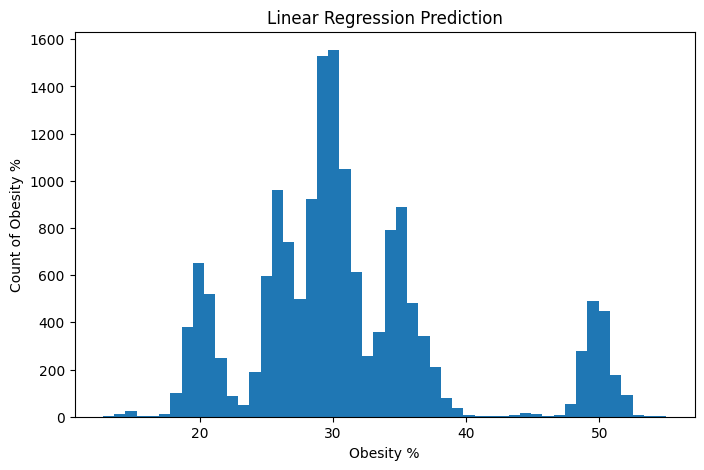

In [113]:
plt.figure(figsize=(8, 5))
plt.hist(regPredict, bins= binSize)
plt.xlabel("Obesity %")
plt.ylabel("Count of Obesity %")
plt.title("Linear Regression Prediction");

In [114]:
np.corrcoef(regPredict, y_test)

array([[1.        , 0.77358384],
       [0.77358384, 1.        ]])

In [39]:
# plot = AgeDF_Anaylsis.plot(x="Age(years)", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Sample Size");

In [40]:
# plot = AgeDF_Anaylsis.plot(x="Age(years)", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"{Question} ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Percentage");

## Education

<a id='graphs-education'></a>

In [41]:
EducationDF_Anaylsis = EducationDF

EducationDF_Anaylsis = EducationDF_Anaylsis[EducationDF_Anaylsis["YearStart"] == Year]
EducationDF_Anaylsis = EducationDF_Anaylsis[EducationDF_Anaylsis["LocationAbbr"] == Location]
EducationDF_Anaylsis = EducationDF_Anaylsis[EducationDF_Anaylsis["Question"] == Question]

EducationDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Education
39770,2015,US,Percent of adults aged 18 years and older who ...,21.7,148030.0,College graduate
39771,2015,US,Percent of adults aged 18 years and older who ...,30.2,109147.0,Some college or technical school
39772,2015,US,Percent of adults aged 18 years and older who ...,31.7,110951.0,High school graduate
39773,2015,US,Percent of adults aged 18 years and older who ...,34.0,29309.0,Less than high school


In [42]:
# plot = EducationDF_Anaylsis.plot(x="Education", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Sample Size");

In [43]:
# plot = EducationDF_Anaylsis.plot(x="Education", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"{Question} ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Percentage");

# Gender Graphs

<a id='graphs-gender'></a>

In [44]:
GenderDF_Anaylsis = GenderDF

GenderDF_Anaylsis = GenderDF_Anaylsis[GenderDF_Anaylsis["YearStart"] == Year]
GenderDF_Anaylsis = GenderDF_Anaylsis[GenderDF_Anaylsis["LocationAbbr"] == Location]
GenderDF_Anaylsis = GenderDF_Anaylsis[GenderDF_Anaylsis["Question"] == Question]

GenderDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Gender
39774,2015,US,Percent of adults aged 18 years and older who ...,28.6,221909.0,Female
39775,2015,US,Percent of adults aged 18 years and older who ...,29.1,176407.0,Male


In [45]:
# plot = GenderDF_Anaylsis.plot(x="Gender", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Sample Size");

In [46]:
# plot = GenderDF_Anaylsis.plot(x="Gender", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"{Question} ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Percentage");

# Income Graphs

<a id='graphs-income'></a>

In [47]:
IncomeDF_Anaylsis = IncomeDF

IncomeDF_Anaylsis = IncomeDF_Anaylsis[IncomeDF_Anaylsis["YearStart"] == Year]
IncomeDF_Anaylsis = IncomeDF_Anaylsis[IncomeDF_Anaylsis["LocationAbbr"] == Location]
IncomeDF_Anaylsis = IncomeDF_Anaylsis[IncomeDF_Anaylsis["Question"] == Question]

IncomeDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Income
39745,2015,US,Percent of adults aged 18 years and older who ...,34.8,33296.0,"Less than $15,000"
39776,2015,US,Percent of adults aged 18 years and older who ...,24.6,109789.0,"$75,000 or greater"
39777,2015,US,Percent of adults aged 18 years and older who ...,24.7,60962.0,Data not reported
39778,2015,US,Percent of adults aged 18 years and older who ...,29.9,54950.0,"$50,000 - $74,999"
39779,2015,US,Percent of adults aged 18 years and older who ...,30.6,48843.0,"$35,000 - $49,999"
39780,2015,US,Percent of adults aged 18 years and older who ...,32.1,36483.0,"$25,000 - $34,999"
39781,2015,US,Percent of adults aged 18 years and older who ...,33.2,53993.0,"$15,000 - $24,999"


In [48]:
# plot = IncomeDF_Anaylsis.plot(x="Income", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Sample Size");

In [49]:
# plot = IncomeDF_Anaylsis.plot(x="Income", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
# plot.set_title(f"{Question} ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Percentage");

# Ethnicity Graphs

<a id='graphs-ethnic'></a>

In [50]:
EthnicityDF_Anaylsis = EthnicityDF

EthnicityDF_Anaylsis = EthnicityDF_Anaylsis[EthnicityDF_Anaylsis["YearStart"] == Year]
EthnicityDF_Anaylsis = EthnicityDF_Anaylsis[EthnicityDF_Anaylsis["LocationAbbr"] == Location]
EthnicityDF_Anaylsis = EthnicityDF_Anaylsis[EthnicityDF_Anaylsis["Question"] == Question]

EthnicityDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity
342,2015,US,Percent of adults aged 18 years and older who ...,10.2,8324.0,Asian
501,2015,US,Percent of adults aged 18 years and older who ...,24.3,1691.0,Other
39782,2015,US,Percent of adults aged 18 years and older who ...,27.9,311093.0,Non-Hispanic White
39783,2015,US,Percent of adults aged 18 years and older who ...,28.9,7409.0,2 or more races
39784,2015,US,Percent of adults aged 18 years and older who ...,32.2,26243.0,Hispanic
39785,2015,US,Percent of adults aged 18 years and older who ...,32.6,738.0,Hawaiian/Pacific Islander
39786,2015,US,Percent of adults aged 18 years and older who ...,36.0,6040.0,American Indian/Alaska Native
39787,2015,US,Percent of adults aged 18 years and older who ...,37.7,31217.0,Non-Hispanic Black


In [51]:
# plot = EthnicityDF_Anaylsis.plot(x="Race/Ethnicity", y=["Sample_Size"], kind="bar", rot=45, figsize=(15, 5))
# plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Sample Size");

In [52]:
# plot = EthnicityDF_Anaylsis.plot(x="Race/Ethnicity", y=["Data_Value"], kind="bar", rot=45, figsize=(15, 5))
# plot.set_title(f"{Question} ({Location}, {Year})")
# # plot.set_xlabel("Size of Firm (Employees)")
# plot.set_ylabel("Percentage");

# To Do

<a id='todo'></a>

- Rename columns
- ~~ Consider removing total column from graphs (Looks good on sample size graphs but bad in percentage graphs) ~~
- ~~ Refactor analysis datasets to include all year data ~~
- Graph multiple years next to each other
- ~~Remove NaN races from ethnic dataset~~
- Combine food_table1 (and other tables from related source) to income and age datasets > Graph results
- Find way to clear the warnings while creating datasets
- Find way to loop dataset creation
- Consider looking up which state has the highest amount of obesity
- Connect food_table1 to location 'US'
- Use donut plot for gender charts due to amount of entries and possibly percentage charts while comparing to amounts that aren't obese
- Add value labels to charts
- Switch to seabass to make charts look nice
- add check to ethnic charts; if certain ethnics aren't in the chart change the rotation